In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/merged_data.csv")

In [ ]:
req_cols = ["gvkey", "tic", "state", "ticker", "co_per_rol", "pceo"]
important_cols = ["revt", "txc", "txdb", "txdi", "txdc", "txt", "Total Income Taxes as % of pretax income", "Total Income Deferred Taxes as % of pretax income", "Total Income Deferred Taxes as % of total assets"]
my_cols = ["salary"]

In [ ]:
all_cols = req_cols + important_cols + my_cols
all_cols

['gvkey',
 'tic',
 'state',
 'ticker',
 'co_per_rol',
 'pceo',
 'revt',
 'txc',
 'txdb',
 'txdi',
 'txdc',
 'txt',
 'Total Income Taxes as % of pretax income',
 'Total Income Deferred Taxes as % of pretax income',
 'Total Income Deferred Taxes as % of total assets',
 'salary']

In [ ]:
import time
start_time = time.time()
baseSalaryData = data[all_cols]
end_time = time.time()

print("Time to execute query:", end_time - start_time, "seconds")

Time to execute query: 0.0021431446075439453 seconds


In [ ]:
print("Number of Rows:", len(baseSalaryData))

Number of Rows: 1152


In [ ]:
print("Number of Columns:", len(baseSalaryData.c))

<Axes: xlabel='salary', ylabel='Total Income Deferred Taxes as % of total assets'>

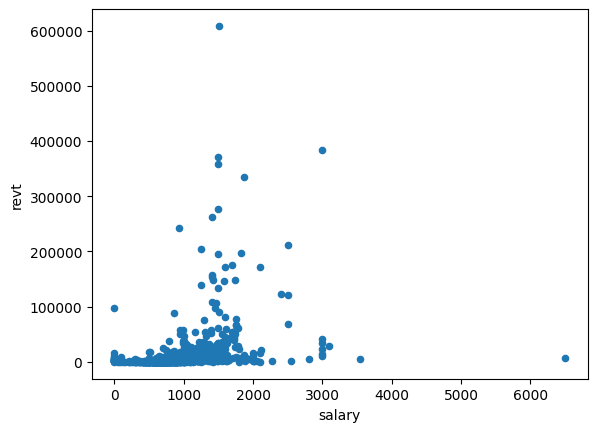

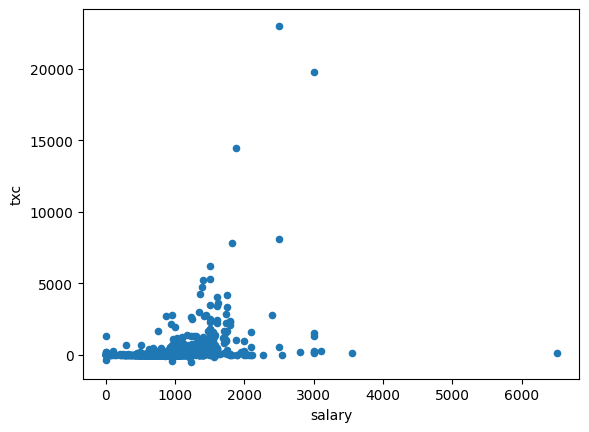

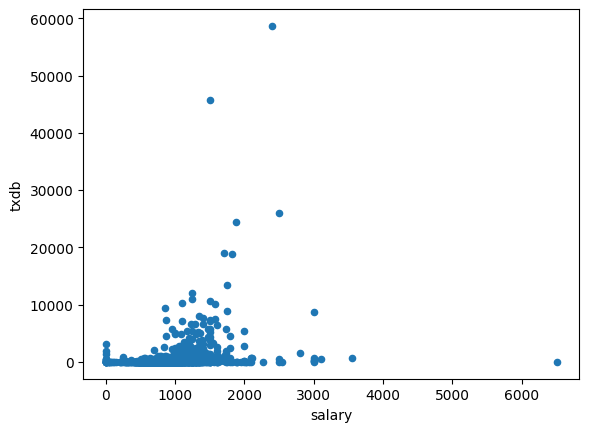

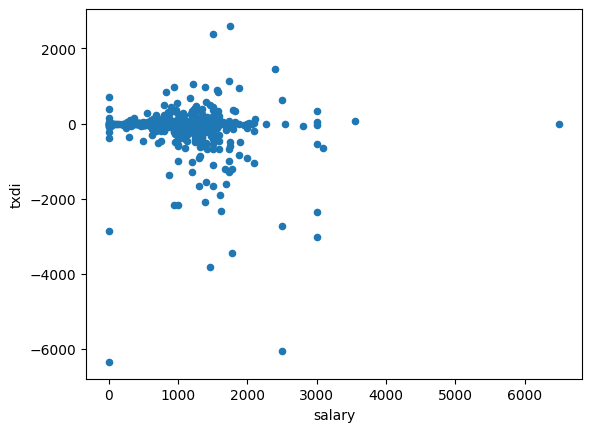

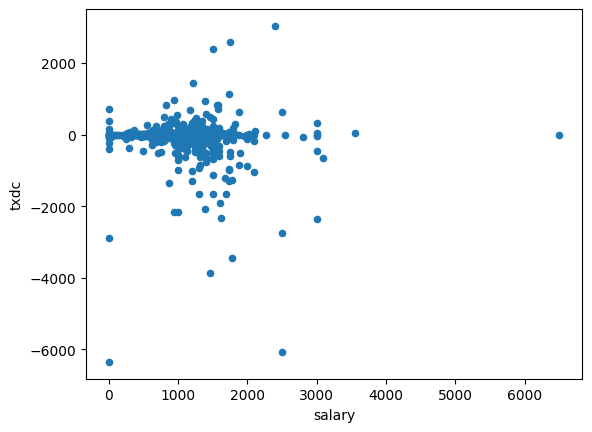

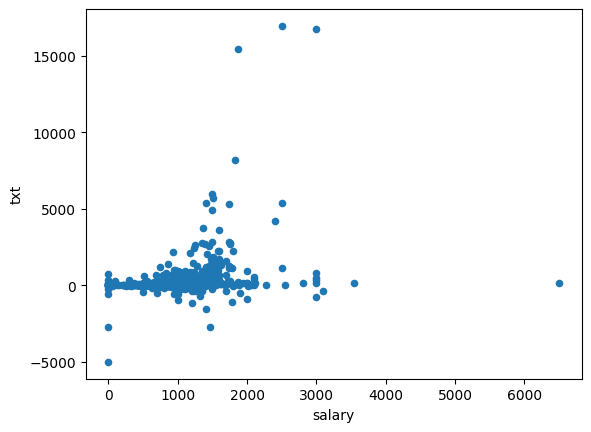

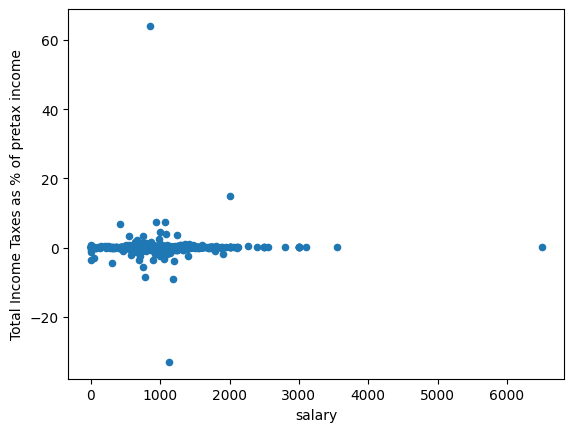

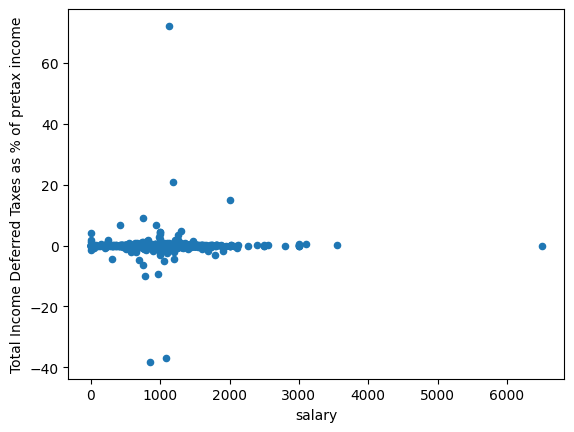

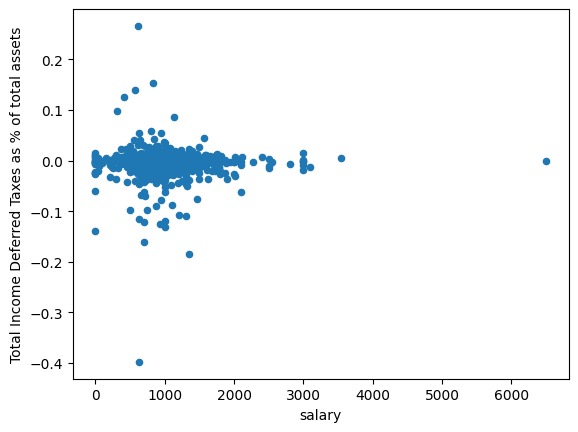

In [ ]:


# Compare salary to effective tax rate
baseSalaryData.plot.scatter(x="salary", y="revt")
baseSalaryData.plot.scatter(x="salary", y="txc")
baseSalaryData.plot.scatter(x="salary", y="txdb")
baseSalaryData.plot.scatter(x="salary", y="txdi")
baseSalaryData.plot.scatter(x="salary", y="txdc")
baseSalaryData.plot.scatter(x="salary", y="txt")
baseSalaryData.plot.scatter(x="salary", y="Total Income Taxes as % of pretax income")
baseSalaryData.plot.scatter(x="salary", y="Total Income Deferred Taxes as % of pretax income")
baseSalaryData.plot.scatter(x="salary", y="Total Income Deferred Taxes as % of total assets")

<Axes: >

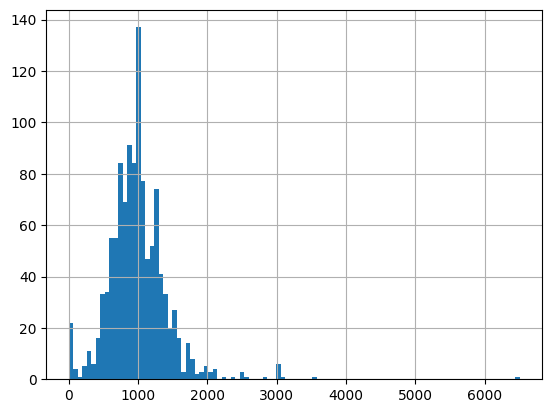

In [ ]:
baseSalaryData["salary"].hist(bins=100)

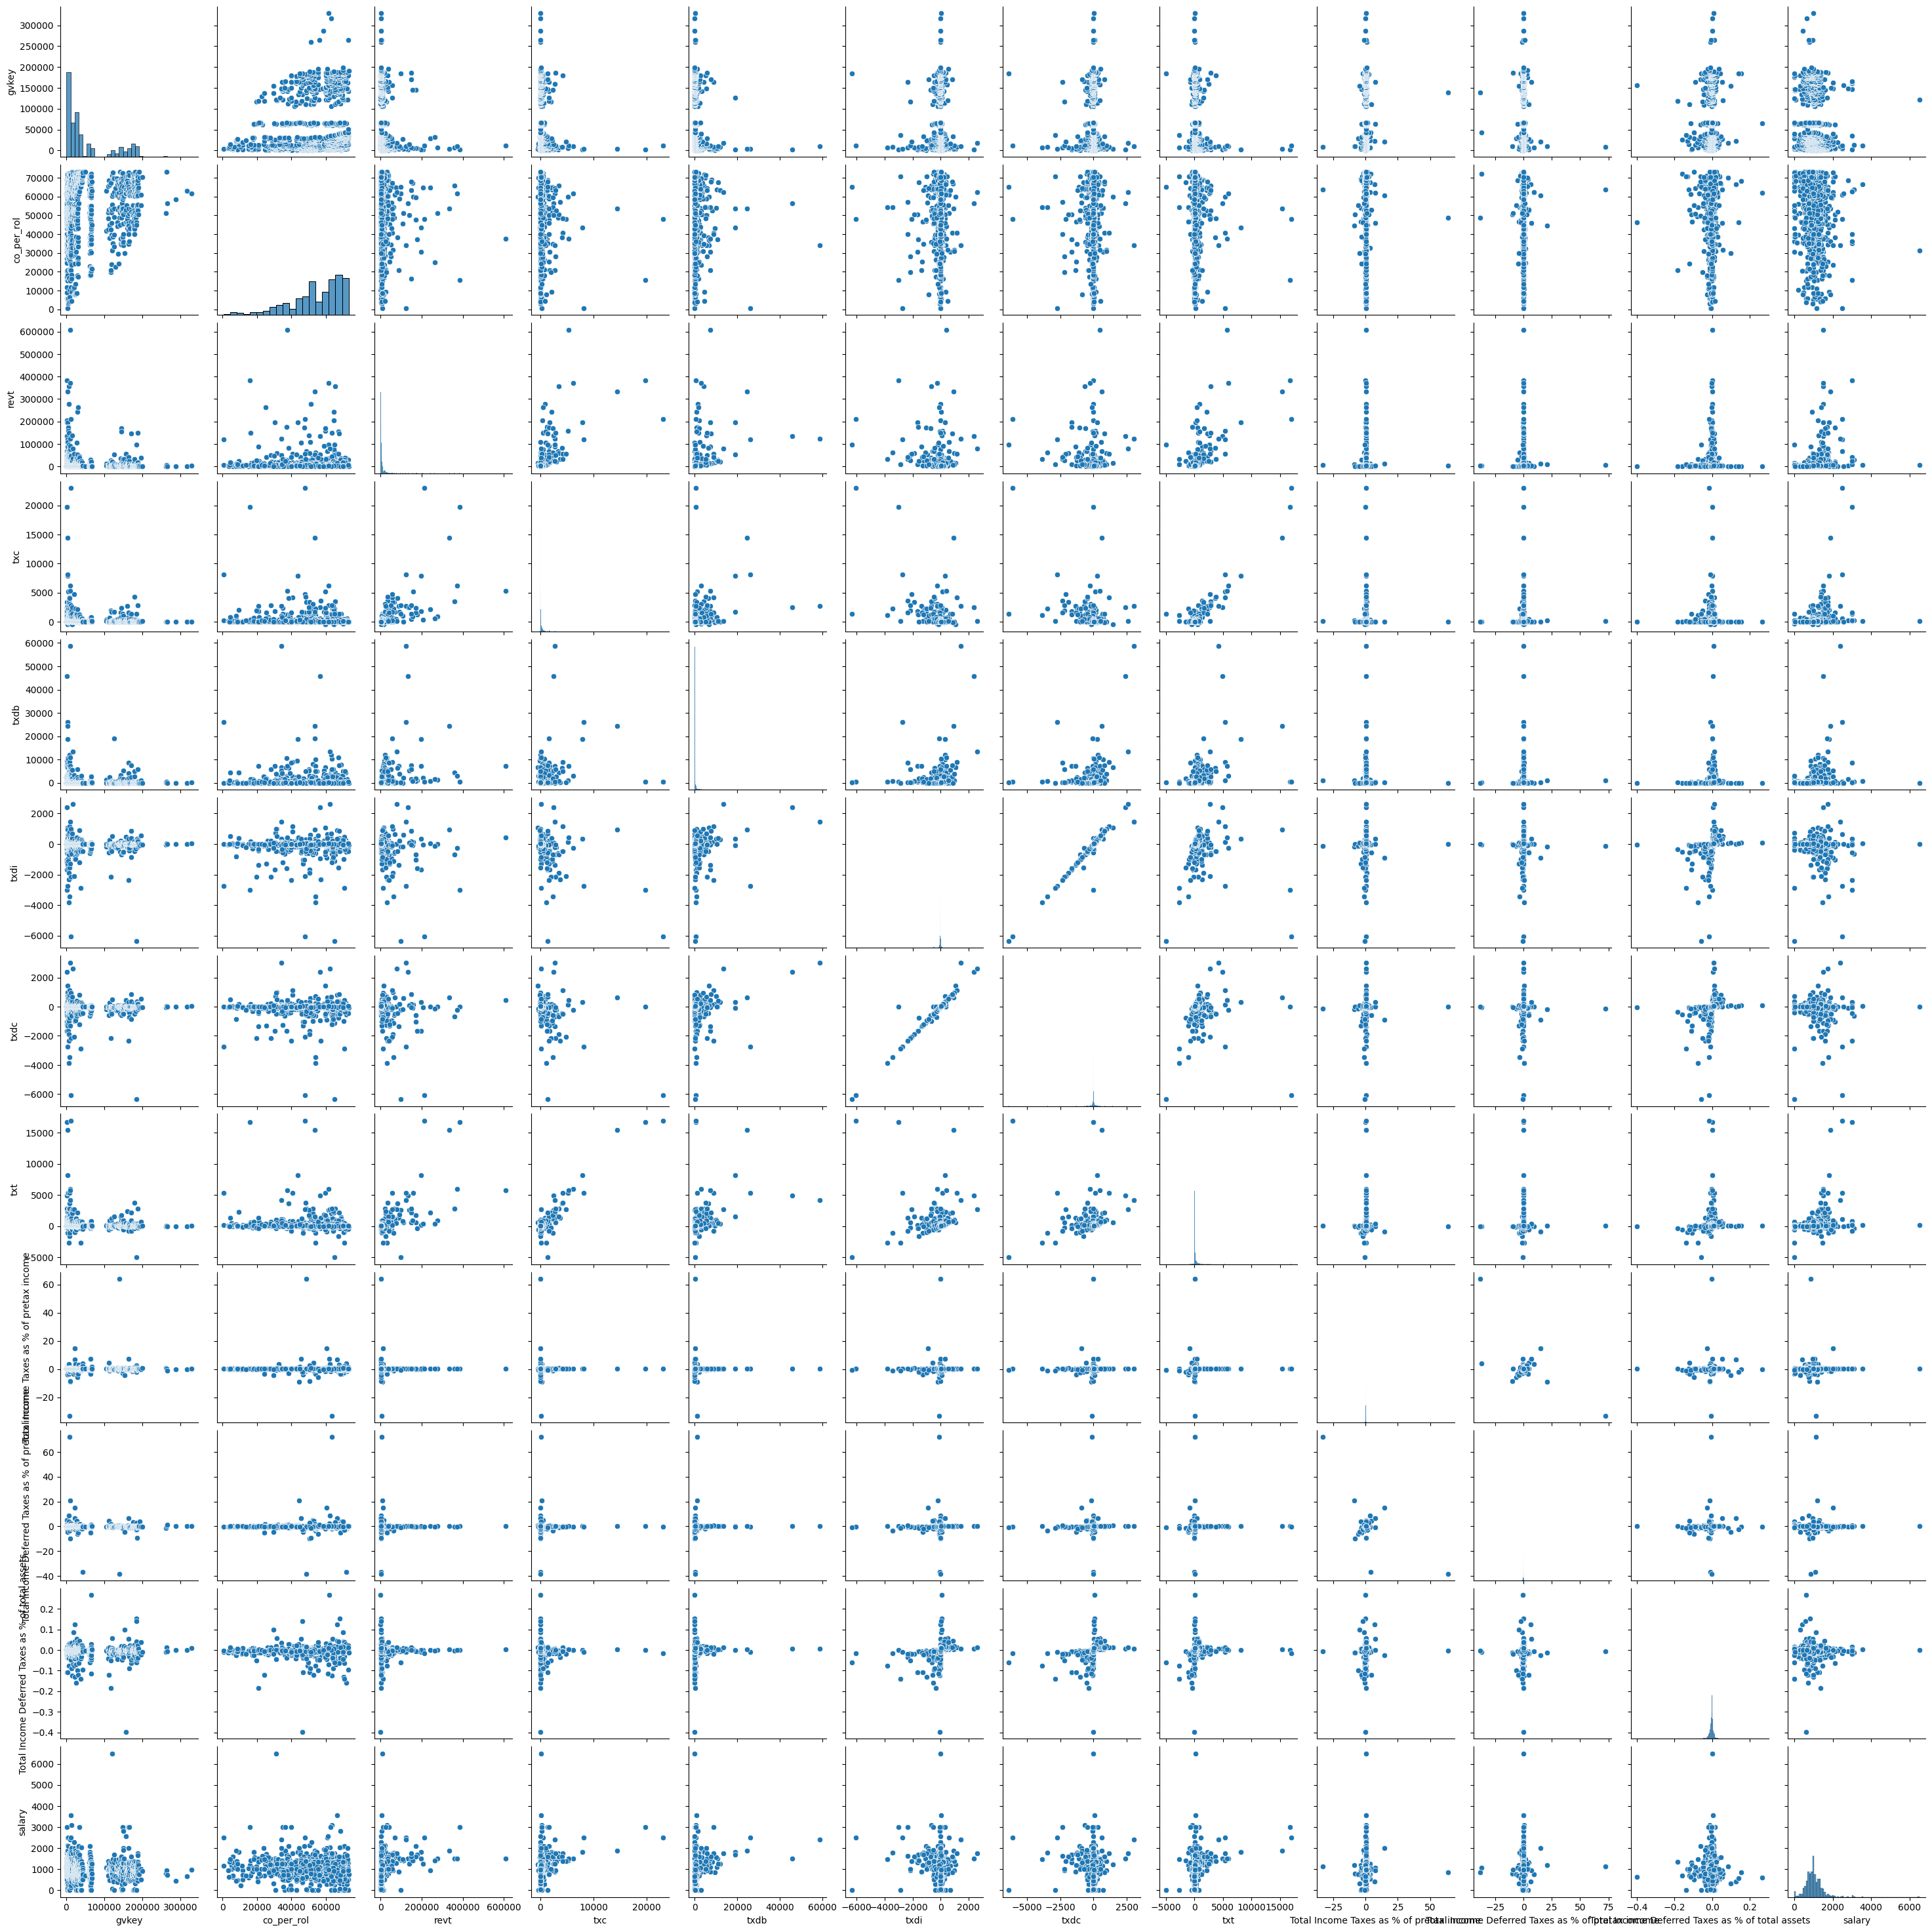

In [ ]:
import seaborn as sns

sns.pairplot(baseSalaryData)

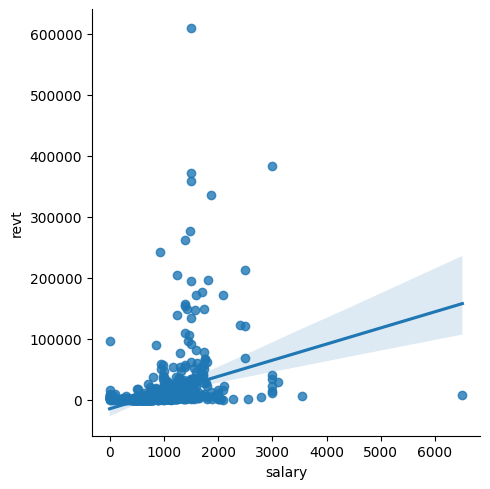

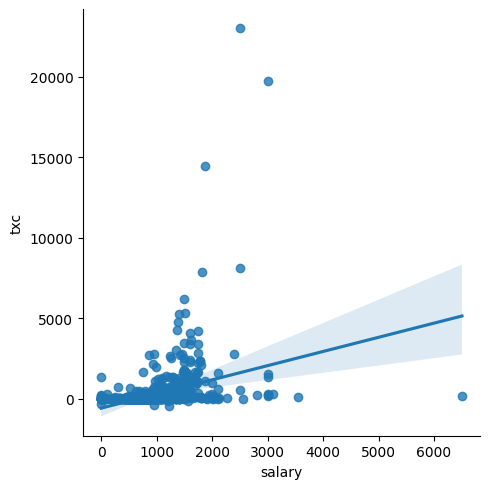

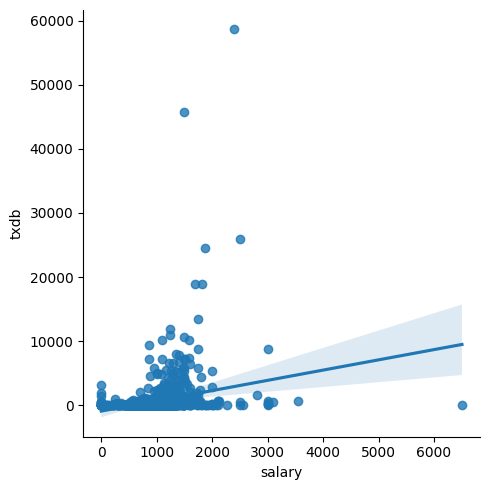

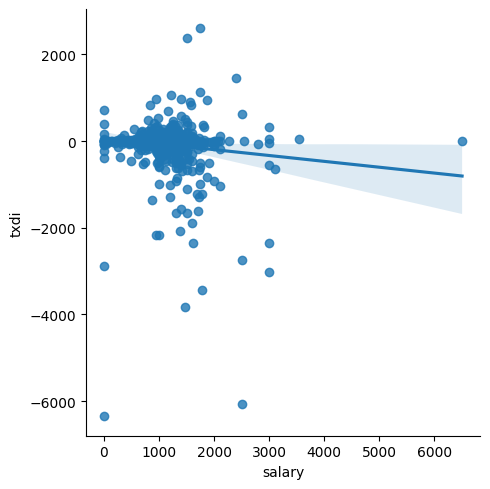

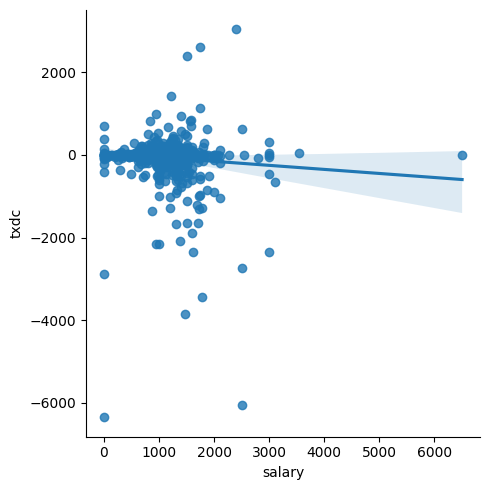

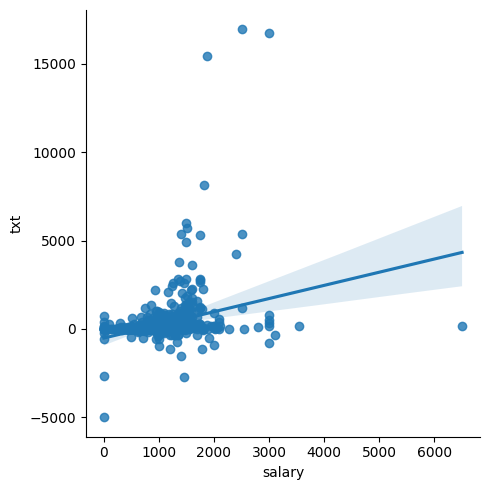

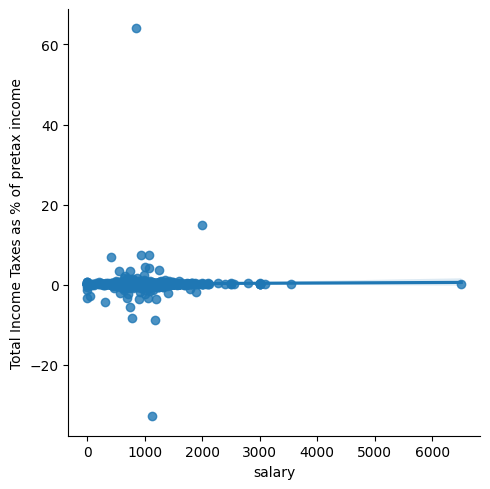

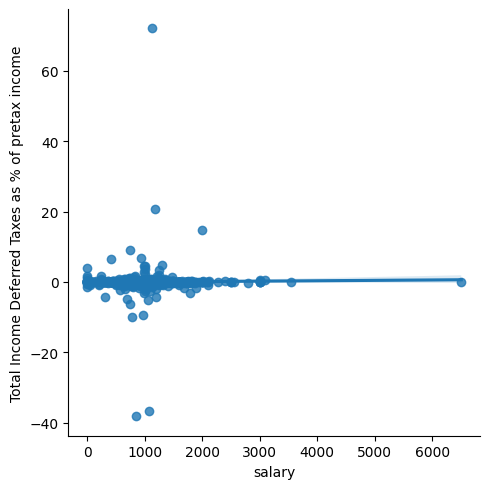

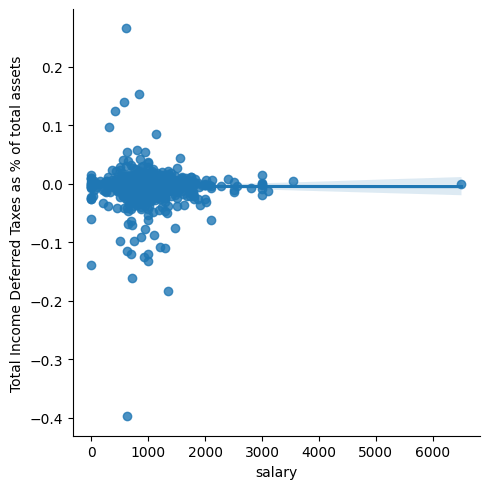

In [ ]:
sns.lmplot(x="salary", y="revt", data=baseSalaryData)
sns.lmplot(x="salary", y="txc", data=baseSalaryData)
sns.lmplot(x="salary", y="txdb", data=baseSalaryData)
sns.lmplot(x="salary", y="txdi", data=baseSalaryData)
sns.lmplot(x="salary", y="txdc", data=baseSalaryData)
sns.lmplot(x="salary", y="txt", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Taxes as % of pretax income", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Deferred Taxes as % of pretax income", data=baseSalaryData)
sns.lmplot(x="salary", y="Total Income Deferred Taxes as % of total assets", data=baseSalaryData)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

results = []

X = np.array(baseSalaryData["salary"])
X = X.reshape(-1, 1)
model = LinearRegression()
X

array([[1050. ],
       [1125. ],
       [1200. ],
       ...,
       [ 442. ],
       [ 650. ],
       [ 980.5]])

In [ ]:
y = np.array(baseSalaryData["revt"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "revt"))

0.0993183406112107


In [ ]:
y = np.array(baseSalaryData["txc"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txc"))

0.10974330281665667


In [ ]:
y = np.array(baseSalaryData["txdb"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdb"))

0.06112679180075431


In [ ]:
y = np.array(baseSalaryData["txdi"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdi"))

0.018666001408773503


In [ ]:
y = np.array(baseSalaryData["txdc"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txdc"))

0.009917642139798954


In [ ]:
y = np.array(baseSalaryData["txt"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "txt"))

0.0994453620213539


In [ ]:
y = np.array(baseSalaryData["Total Income Taxes as % of pretax income"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Taxes as % of pretax income"))

0.00014653294282995777


In [ ]:
y = np.array(baseSalaryData["Total Income Deferred Taxes as % of pretax income"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Deferred Taxes as % of pretax income"))

0.00030541830667396574


In [ ]:
y = np.array(baseSalaryData["Total Income Deferred Taxes as % of total assets"])
model.fit(X, y)
y_pred = model.predict(X)
print(r2_score(y, y_pred))
results.append((r2_score(y, y_pred), "Total Income Deferred Taxes as % of total assets"))

1.4385642035374957e-06


In [ ]:
max = results[0]

for result in results:
  if result[0] > max[0]:
    max = result

print("Maximum r^2 score:", max)

Maximum r^2 score: (0.10974330281665667, 'txc')


Salary appears to have very little impact on company tax factors such as effective tax rate and deferred tax percentage.